## Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential, Model
from keras.layers import Dense, MaxPool2D, Conv2D, Flatten, Dropout, Input, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from warnings import filterwarnings

In [3]:
filterwarnings('ignore')

## Image Augmentation

### Training set

In [36]:
train_aug = ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [37]:
train_set = train_aug.flow_from_directory(
    directory = '../../../Datasets/Image classification datasets/agricultural_crop_images/train',
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1359 images belonging to 5 classes.


### Test set

In [38]:
test_aug = ImageDataGenerator(
    rescale = 1.0/255,
)

In [39]:
test_set = test_aug.flow_from_directory(
    directory = '../../../Datasets/Image classification datasets/agricultural_crop_images/test',
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 224 images belonging to 5 classes.


### Crops to predict

In [40]:
crops = train_set.class_indices
crops

{'jute': 0, 'maize': 1, 'rice': 2, 'sugarcane': 3, 'wheat': 4}

## CNN Model

In [114]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'valid', strides = (1, 1), input_shape = (64, 64, 3), activation = 'relu'))

model.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2), padding = 'same'))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', strides = (1, 1), activation = 'relu'))

model.add(MaxPool2D(pool_size = (2, 2), strides = (1, 1), padding = 'same'))

model.add(Conv2D(filters = 100, kernel_size = (3, 3), padding = 'valid', strides = (1, 1), activation = 'relu'))

model.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2), padding = 'same'))

model.add(Flatten())

model.add(Dense(units = 256, activation = 'relu'))

model.add(Dense(units = 256, activation = 'relu'))

model.add(Dropout(rate = 0.5))

model.add(Dense(units = 128, activation = 'relu'))

model.add(Dense(units = 5, activation = 'softmax'))

In [115]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = ['accuracy'])

In [116]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 31, 31, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_40 (Conv2D)          (None, 31, 31, 64)        36928     
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 31, 31, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_41 (Conv2D)          (None, 29, 29, 100)       57700     
                                                                 
 max_pooling2d_41 (MaxPooli  (None, 15, 15, 100)     

In [117]:
checkpoint = ModelCheckpoint(
    'best_model4.h5',  # Filepath to save the model
    monitor='val_accuracy',  # Metric to monitor (e.g., validation accuracy)
    save_best_only=True,     # Save only if the monitored metric improves
    mode='max',              # 'max' for accuracy, 'min' for loss, etc.
    verbose=1                # 1 for progress updates, 0 for silent
)

In [118]:
history = model.fit(x = train_set, validation_data = test_set, epochs = 50, callbacks = [checkpoint])

Epoch 1/50
43/43 [==============================] - ETA: 0s - loss: 1.5765 - accuracy: 0.2642
Epoch 1: val_accuracy improved from -inf to 0.27679, saving model to best_model3.h5
43/43 [==============================] - 13s 274ms/step - loss: 1.5765 - accuracy: 0.2642 - val_loss: 1.5290 - val_accuracy: 0.2768
Epoch 2/50
43/43 [==============================] - ETA: 0s - loss: 1.4806 - accuracy: 0.3341
Epoch 2: val_accuracy improved from 0.27679 to 0.29018, saving model to best_model3.h5
43/43 [==============================] - 12s 274ms/step - loss: 1.4806 - accuracy: 0.3341 - val_loss: 1.4347 - val_accuracy: 0.2902
Epoch 3/50
43/43 [==============================] - ETA: 0s - loss: 1.3743 - accuracy: 0.4180
Epoch 3: val_accuracy improved from 0.29018 to 0.31696, saving model to best_model3.h5
43/43 [==============================] - 12s 269ms/step - loss: 1.3743 - accuracy: 0.4180 - val_loss: 1.7232 - val_accuracy: 0.3170
Epoch 4/50
43/43 [==============================] - ETA: 0s - lo

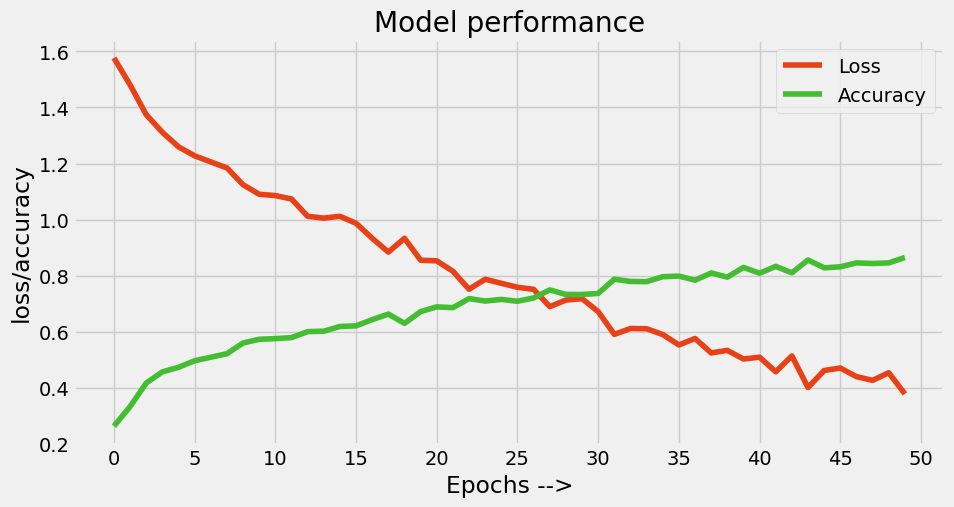

In [121]:
fig = plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
plt.plot(history.history['loss'], c = "#e84118", label = "Loss")
plt.plot(history.history['accuracy'], c = '#44bd32', label = 'Accuracy')
plt.xticks(np.arange(0, 55, 5))
plt.xlabel("Epochs -->")
plt.ylabel("loss/accuracy")
plt.legend()
plt.title("Model performance");

## Transfer Learning with `EfficientNetB2` model

### Image Augmentation

In [20]:
train_aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [21]:
train_set = train_aug.flow_from_directory(
    directory = '../../../Datasets/Image classification datasets/agricultural_crop_images/train',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1359 images belonging to 5 classes.


In [46]:
test_aug = ImageDataGenerator()

In [47]:
test_set = test_aug.flow_from_directory(
    directory = '../../../Datasets/Image classification datasets/agricultural_crop_images/test',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 224 images belonging to 5 classes.


In [24]:
early_stop = EarlyStopping(
    restore_best_weights=True,
    verbose=1, 
    monitor='val_accuracy',
    patience=3
)

### Downloading the pre-trained model

In [25]:
from tensorflow.keras.applications.efficientnet import EfficientNetB2

In [26]:
effnetb2 = EfficientNetB2(include_top=False)
effnetb2.trainable = False

### Train

In [27]:
input = Input(shape = (224, 224, 3), name = 'input_layer')

x = effnetb2(input, training = False)
x = Dense(units = 128, activation = 'relu')(x)
x = GlobalAveragePooling2D(name = 'global_avg_pool')(x)

output = Dense(units = len(crops), activation = 'softmax', name = 'output_layer')(x)

effnetb2_model = Model(input, output)

In [28]:
effnetb2_model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [29]:
effnetb2_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb2 (Functional  (None, None, None, 1408   7768569   
 )                           )                                   
                                                                 
 dense_1 (Dense)             (None, 7, 7, 128)         180352    
                                                                 
 global_avg_pool (GlobalAve  (None, 128)               0         
 ragePooling2D)                                                  
                                                                 
 output_layer (Dense)        (None, 5)                 645       
                                                                 
Total params: 7949566 (30.33 MB)
Trainable params: 180997 (70

In [30]:
effnet_history = effnetb2_model.fit(train_set, validation_data = test_set, epochs = 10, callbacks = [early_stop])

Epoch 1/10
43/43 [==============================] - 95s 2s/step - loss: 0.9385 - accuracy: 0.6380 - val_loss: 0.6822 - val_accuracy: 0.7634
Epoch 2/10
43/43 [==============================] - 73s 2s/step - loss: 0.4658 - accuracy: 0.8271 - val_loss: 0.4371 - val_accuracy: 0.8661
Epoch 3/10
43/43 [==============================] - 72s 2s/step - loss: 0.3333 - accuracy: 0.8940 - val_loss: 0.3743 - val_accuracy: 0.8705
Epoch 4/10
43/43 [==============================] - 73s 2s/step - loss: 0.2962 - accuracy: 0.8992 - val_loss: 0.3465 - val_accuracy: 0.8705
Epoch 5/10
43/43 [==============================] - 72s 2s/step - loss: 0.2376 - accuracy: 0.9242 - val_loss: 0.3011 - val_accuracy: 0.9018
Epoch 6/10
43/43 [==============================] - 64s 1s/step - loss: 0.1863 - accuracy: 0.9441 - val_loss: 0.2358 - val_accuracy: 0.9196
Epoch 7/10
43/43 [==============================] - 50s 1s/step - loss: 0.1643 - accuracy: 0.9522 - val_loss: 0.2408 - val_accuracy: 0.9196
Epoch 8/10
43/43 [==

In [31]:
effnetb2_model.evaluate(test_set)

7/7 [==============================] - 8s 1s/step - loss: 0.1880 - accuracy: 0.9464


[0.18801066279411316, 0.9464285969734192]

In [32]:
effnetb2_model.save('effnetb2_model.keras')

In [33]:
from keras.models import load_model

## Model performances

In [34]:
model1 = load_model('best_model.h5')
model2 = load_model('best_model2.h5')
model3 = load_model('best_model3.h5')
effnetb2_model = load_model('./effnetb2_model.keras')

In [41]:
print(f"Model 1 accuracy : {model1.evaluate(test_set, verbose=0)[1]:.3f}")

Model 1 accuracy : 0.821


In [42]:
print(f"Model 2 accuracy : {model2.evaluate(test_set, verbose=0)[1]:.3f}")

Model 2 accuracy : 0.817


In [43]:
print(f"Model 3 accuracy : {model3.evaluate(test_set, verbose=0)[1]:.3f}")

Model 3 accuracy : 0.835


In [48]:
print(f"EfficientNet B2 accuracy : {effnetb2_model.evaluate(test_set, verbose=0)[1]:.3f}")

EfficientNet B2 accuracy : 0.946


## Predictions

In [50]:
def predict_crop_img(model, img_path, img_width, rescale = False):
    import numpy as np
    from keras.preprocessing.image import img_to_array
    from keras.utils import load_img
    '''
    PARAMETERS 
    -----------
    model = Trained model
    img_path (str) : relative or absolute path of the image
    img_width : image width (e.g, 224 or 64 or 256 etc.)
    rescale : True if rescaling needed, else False

    RETURN
    -------
    Returns None
    '''
    
    img = load_img(img_path, target_size = (img_width, img_width, 3))
    img_array = img_to_array(img)
    if rescale:
        img_array = img_array / 255.
    img_array = img_array.reshape(1, img_width, img_width, 3)

    prediction = model.predict(img_array, verbose = 0)
    crop_ind = np.argmax(prediction)

    print(f"Predicted crop : {list(crops)[crop_ind]}")

In [52]:
from urllib.request import urlretrieve
from keras.preprocessing.image import img_to_array
from keras.utils import load_img

### Wheat

#### 1.

In [85]:
urlretrieve("https://cdn.britannica.com/18/122518-050-A0740F9F/Field-durum-wheat.jpg", "wheat1.jpg")

('wheat1.jpg', <http.client.HTTPMessage at 0x290ca842d90>)

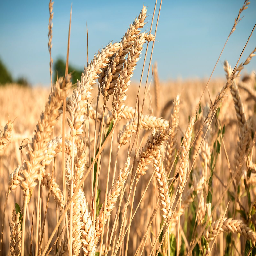

In [87]:
load_img("test_images/wheat1.jpg", target_size=(256, 256, 3))

In [89]:
predict_crop_img(model = effnetb2_model, img_path = './test_images/wheat1.jpg', img_width = 224, rescale=False)

Predicted crop : wheat


#### 2.

In [63]:
urlretrieve("https://c8.alamy.com/comp/RAYEKH/bio-farming-unripe-green-wheat-plants-growing-on-field-RAYEKH.jpg", "wheat2.jpg")

('wheat2.jpg', <http.client.HTTPMessage at 0x238bf7f2e90>)

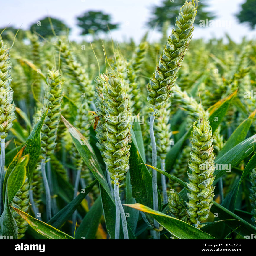

In [64]:
load_img("wheat2.jpg", target_size = (256, 256))

In [56]:
predict_crop_img(model = effnetb2_model, img_path = './wheat2.jpg', img_width = 224, rescale=False)

Predicted crop : wheat


#### 3.

In [73]:
urlretrieve("https://st.depositphotos.com/1806346/2433/i/450/depositphotos_24330483-stock-photo-early-summer-wheat-crop-blowing.jpg", "wheat3.jpg")

('wheat3.jpg', <http.client.HTTPMessage at 0x238bf7a1790>)

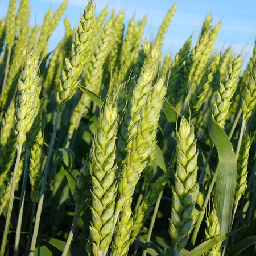

In [74]:
load_img("wheat3.jpg", target_size=(256, 256))

In [57]:
predict_crop_img(model = effnetb2_model, img_path = './wheat3.jpg', img_width = 224, rescale=False)

Predicted crop : wheat


### Rice

#### 1.

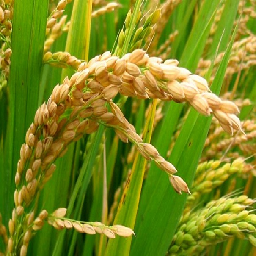

In [60]:
load_img('rice.jpg', target_size=(256, 256, 3))

In [58]:
predict_crop_img(model = effnetb2_model, img_path = './rice.jpg', img_width = 224, rescale=False)

Predicted crop : wheat


#### 2.

In [21]:
urlretrieve("https://cdn.britannica.com/99/150499-050-ECBF2AED/Rice-cultivation-path-flooded-rice-paddy-Philippines.jpg", "rice2.jpg")

('rice2.jpg', <http.client.HTTPMessage at 0x238b1058250>)

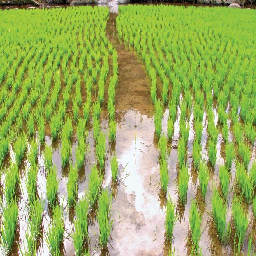

In [22]:
load_img("rice2.jpg", target_size = (256, 256))

In [59]:
predict_crop_img(model = effnetb2_model, img_path = './rice2.jpg', img_width = 224, rescale=False)

Predicted crop : maize


### Maize/corn

#### 1.

In [60]:
urlretrieve("https://m.media-amazon.com/images/I/81WY4vdCR5L._AC_UF1000,1000_QL80_.jpg", "corn.jpg")

('corn.jpg', <http.client.HTTPMessage at 0x290c7ce2d50>)

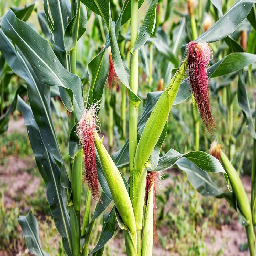

In [61]:
load_img("corn.jpg", target_size = (256, 256, 3))

In [62]:
predict_crop_img(model = effnetb2_model, img_path = './corn.jpg', img_width = 224, rescale=False)

Predicted crop : maize


#### 2.

In [63]:
urlretrieve("https://cf.organicbazar.net/wp-content/uploads/2021/06/8.jpg", "maize-img.jpg")

('maize-img.jpg', <http.client.HTTPMessage at 0x290c7d7df10>)

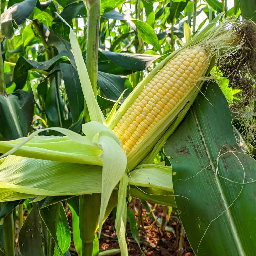

In [64]:
load_img("maize-img.jpg", target_size=(256, 256))

In [66]:
predict_crop_img(model = effnetb2_model, img_path = './maize-img.jpg', img_width = 224, rescale=False)

Predicted crop : maize


### Sugarcane

#### 1.

In [67]:
urlretrieve("https://m.media-amazon.com/images/I/71otw5qA4OL._AC_UF1000,1000_QL80_.jpg", "sugarcane.jpg")

('sugarcane.jpg', <http.client.HTTPMessage at 0x290c7d97490>)

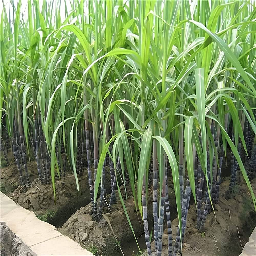

In [68]:
load_img("sugarcane.jpg", target_size=(256, 256))

In [69]:
predict_crop_img(model = effnetb2_model, img_path = './sugarcane.jpg', img_width = 224, rescale=False)

Predicted crop : sugarcane


#### 2.

In [70]:
urlretrieve("https://www.thespruce.com/thmb/yj7MNHjQra_5a8taDiZZ1vpiizE=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/SugarCanesSaccharumofficinarumNancyAyumi-26c9c80ee473464bbe322c83ecd9bfc1.jpg", "sugarcane2.jpg")

('sugarcane2.jpg', <http.client.HTTPMessage at 0x290c7d06210>)

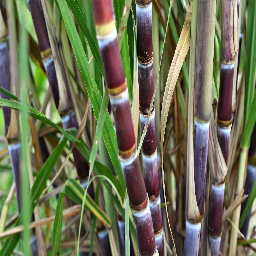

In [71]:
load_img("sugarcane2.jpg", target_size = (256, 256))

In [72]:
predict_crop_img(model = effnetb2_model, img_path = './sugarcane2.jpg', img_width = 224, rescale=False)

Predicted crop : sugarcane


### Jute

#### 1.

In [73]:
urlretrieve("https://img.freepik.com/premium-photo/green-jute-plantation-field-raw-jute-plant-texture-background_656518-197.jpg?w=360", "jute.jpg")

('jute.jpg', <http.client.HTTPMessage at 0x290c7d77950>)

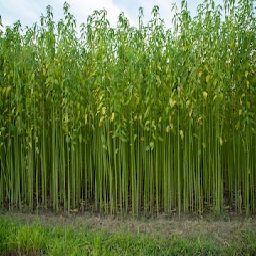

In [74]:
load_img("jute.jpg", target_size=(256, 256))

In [78]:
predict_crop_img(model = model3, img_path = './jute.jpg', img_width = 64, rescale=True)

Predicted crop : jute


#### 2.

In [79]:
urlretrieve("https://as1.ftcdn.net/v2/jpg/03/09/09/90/1000_F_309099046_DpOMC2l4bF35z9Gb7UWeOk5NTXSXwULz.jpg", "jute2.jpg")

('jute2.jpg', <http.client.HTTPMessage at 0x290ca2a0a90>)

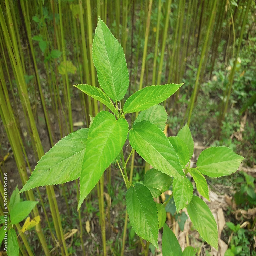

In [80]:
load_img("jute2.jpg", target_size = (256, 256))

In [82]:
predict_crop_img(model = effnetb2_model, img_path = './jute2.jpg', img_width = 224, rescale=False)

Predicted crop : jute
